In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
data = pd.read_csv(data_url)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
data = data[(data.location == "Russia") & (data.date >= "2020-03-02")]
data = data[["date", "total_cases", "new_cases"]]

In [4]:
train_data = data.iloc[:50]

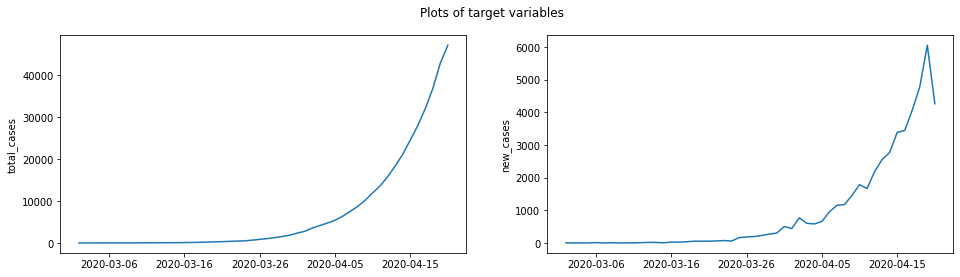

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Plots of target variables')

ax1.set_ylabel("total_cases")
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax1.plot(train_data.date, train_data.total_cases)

ax2.set_ylabel("new_cases")
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax2.plot(train_data.date, train_data.new_cases)

In [6]:
X = [[x] for x in range(len(train_data))]
y = np.log(train_data.total_cases.values)
model = LinearRegression().fit(X, y)

In [7]:
print(model.score(X, y))
model.coef_, model.intercept_

0.9863266281879147


(array([0.20114818]), 1.5552350156209283)

In [8]:
from datetime import datetime
start_date = datetime.strptime("2020-03-02", '%Y-%M-%d')
dates_to_count = ["2020-05-01", "2020-06-01", "2020-09-01"]
days = [(datetime.strptime(x, '%Y-%m-%d') - start_date).days for x in dates_to_count]

In [9]:
predict = np.exp(model.predict([[x] for x in days]))
for i in range(3):
    print(f"{dates_to_count[i]} : {predict[i]}")

2020-05-01 : 117754583304.39624
2020-06-01 : 60125916536675.67
2020-09-01 : 6.545696034292865e+21
